# Pacotes


In [71]:
import pandas as pd
import numpy as np
import os
import openpyxl
from openpyxl import load_workbook
import seaborn as sn
from itertools import permutations, product
import matplotlib.pyplot as mplt
import scipy.stats as stats
from tabulate import tabulate
import scipy.stats as ss
from scipy.stats import chi2_contingency 
import statsmodels.api as sm
import statsmodels.tools as smt
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from sklearn.svm import SVC
import re


In [72]:
# setar diretorio dos cadernos (codigo caso puxe os arquivos com todas as colunas originais do ibge)
diretorio = r'C:\Users\Computadores Gamer\OneDrive\Área de Trabalho\dados gradilene\dados'
diretorio = diretorio.replace('\\', '/')

os.chdir(diretorio)
os.getcwd()

'C:\\Users\\Computadores Gamer\\OneDrive\\Área de Trabalho\\dados gradilene\\dados'

# Cadernos IBGE
Os cadernos que são importados são: DOMICILIO, CONDICOES_VIDA, MORADOR_QUALI_VIDA, MORADOR.
2017 - 2018
Fonte: https://www.ibge.gov.br/estatisticas/sociais/saude/24786-pesquisa-de-orcamentos-familiares-2.html

In [73]:
#### DOMICILIO
# largura do txt
larguras = [2,4,1,9,2,1,1,1,1,2,1,1,1,1,1,1,1,1,1,2,
            1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,14,14,1]

# nome das colunas
colunas = ["UF", "ESTRATO_POF", "TIPO_SITUACAO_REG",
            "COD_UPA", "NUM_DOM", "V0201", "V0202",
            "V0203", "V0204", "V0205", "V0206", "V0207",
            "V0208", "V0209", "V02101", "V02102",
            "V02103", "V02104", "V02105", "V02111",
            "V02112", "V02113", "V0212", "V0213",
            "V02141", "V02142", "V0215", "V02161",
            "V02162", "V02163", "V02164", "V0217",
            "V0219", "V0220", "V0221", "PESO",
            "PESO_FINAL", "V6199"]

# leitura dos dados
DOMICILIO = pd.read_fwf(
    os.path.join(diretorio, "DOMICILIO.txt"), 
    widths=larguras,
    na_values=[" "],
    names=colunas,
    decimal="."
)

##### CONDICOES_VIDA
# largura do txt
larguras = [2,4,1,9,2,1,2,1,6,5,1,1,1,1,1,
            1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
            1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
            1,1,1,1,1,1,1,14,14,10]

# nome das colunas
colunas = ["UF", "ESTRATO_POF", "TIPO_SITUACAO_REG",
            "COD_UPA", "NUM_DOM", "NUM_UC", "COD_INFORMANTE",
            "V6101", "V6102", "V6103", "V61041", "V61042",
            "V61043", "V61044", "V61045", "V61046",
            "V61051", "V61052", "V61053", "V61054",
            "V61055", "V61056", "V61057", "V61058",
            "V61061", "V61062", "V61063", "V61064",
            "V61065", "V61066", "V61067", "V61068",
            "V61069", "V610610", "V610611", "V61071",
            "V61072", "V61073", "V6108", "V6109",
            "V6110", "V6111", "V6112", "V6113", "V6114",
            "V6115", "V6116", "V6117", "V6118", "V6119",
            "V6120", "V6121", "PESO", "PESO_FINAL",
            "RENDA_TOTAL"]

# leitura dos dados
CONDICOES_VIDA = pd.read_fwf(
    os.path.join(diretorio, "CONDICOES_VIDA.txt"),
    widths=larguras,
    na_values=[" "],
    names=colunas,
    decimal="."
)


##### MORADOR_QUALI_VIDA
# largura do txt
larguras = [2,4,1,9,2,1,2,20,20,1,1,1,1,1,
            1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
            1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
            1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
            1,1,1,1,1,1,1,1,2,20,20,14,14]

# nome das colunas
colunas = ["UF","ESTRATO_POF","TIPO_SITUACAO_REG","COD_UPA",
            "NUM_DOM","NUM_UC","COD_INFORMANTE","CONTAGEM_PONDERADA",
            "FUNCAO_PERDA","V201","V202","V204","V205","V206",
            "V207","V208","V209","V210","V211","V212","V214","V215",
            "V216","V217","V301","V302","V303","V304","V305","V306",
            "V307","V308","V401","V402","V403","V501","V502","V503",
            "V504","V505","V506","V601","V602","V603","V604","V605",
            "V606","V607","V608","V609","V610","V611","V701","V702",
            "V703","V704","V801","V802","V901","V902","GRANDE_REGIAO",
            "C1","C2","C3","C4","C5","C6","C7","RENDA_DISP_PC",
            "RENDA_DISP_PC_SS","PESO","PESO_FINAL"]

# leitura dos dados
MORADOR_QUALI_VIDA = pd.read_fwf(
    os.path.join(diretorio, "MORADOR_QUALI_VIDA.txt"),
    widths=larguras,
    na_values=[" "],
    names=colunas,
    decimal="."
)


#### MORADOR
# largura do txt
larguras = [2,4,1,9,2,1,2,2,1,2,2,4,3,1,1,
            1,1,1,2,1,2,1,1,1,1,1,1,1,1,1,
            1,1,1,1,1,2,1,1,2,1,1,2,1,1,1,
            2,1,2,14,14,10,1,20,20,20,20]

# nome das colunas
colunas = ["UF", "ESTRATO_POF", "TIPO_SITUACAO_REG",
            "COD_UPA", "NUM_DOM", "NUM_UC", "COD_INFORMANTE",
            "V0306", "V0401", "V04021", "V04022", "V04023",
            "V0403", "V0404", "V0405", "V0406", "V0407",
            "V0408", "V0409", "V0410", "V0411", "V0412",
            "V0413", "V0414", "V0415", "V0416",
            "V041711", "V041712", "V041721", "V041722",
            "V041731", "V041732", "V041741", "V041742",
            "V0418", "V0419", "V0420", "V0421", "V0422",
            "V0423", "V0424", "V0425", "V0426", "V0427",
            "V0428", "V0429", "V0430", "ANOS_ESTUDO",
            "PESO", "PESO_FINAL", "RENDA_TOTAL",
            "NIVEL_INSTRUCAO", "RENDA_DISP_PC","RENDA_MONET_PC",
            "RENDA_NAO_MONET_PC","DEDUCAO_PC" ]

# leitura dos dados
MORADOR = pd.read_fwf(
    os.path.join(diretorio, "MORADOR.txt"),
    widths=larguras,
    na_values=[" "],
    names=colunas,
    decimal="."
)





# União dos Cadernos
Foi feito o processo de 'merge' do pacote 'pandas' entre os cadernos importados.

In [74]:
# Merges 
# pd.set_option('display.max_columns', 100)
bigdata = pd.merge(DOMICILIO, MORADOR, on = ['UF', 'ESTRATO_POF',"TIPO_SITUACAO_REG","COD_UPA", "NUM_DOM"], how='left')
bigdata2 = pd.merge(CONDICOES_VIDA, bigdata, on = ['UF', 'ESTRATO_POF',"TIPO_SITUACAO_REG","COD_UPA", "NUM_DOM"], how = 'right')
base = pd.merge(MORADOR_QUALI_VIDA, bigdata2, on = ['UF', 'ESTRATO_POF',"TIPO_SITUACAO_REG","COD_UPA", "NUM_DOM"],how = 'right')


# removendo colunas duplicadas, ou seja, com sufixo '_x' e '_y'
# '$' indica trecho no final da palavra
colunas_del_x = base.filter(regex=f'_x$').columns
base = base.drop(colunas_del_x, axis=1)

colunas_del_y = base.filter(regex=f'_y$').columns
base = base.drop(colunas_del_y, axis=1)

C:\Users\Computadores Gamer\AppData\Local\Temp\ipykernel_11216\122688453.py:5: FutureWarning: Passing 'suffixes' which cause duplicate columns {'PESO_y', 'PESO_FINAL_y'} in the result is deprecated and will raise a MergeError in a future version.
  base = pd.merge(MORADOR_QUALI_VIDA, bigdata2, on = ['UF', 'ESTRATO_POF',"TIPO_SITUACAO_REG","COD_UPA", "NUM_DOM"],how = 'right')


In [75]:
# verificando 'na' nas colunas que serão utilizadas no decorrer do código
# esse código é mais performático
# passou de 693k linhas para 682k linhas
base = base[['UF', 'ESTRATO_POF','TIPO_SITUACAO_REG','COD_UPA', 'NUM_DOM','RENDA_MONET_PC','V6199','V6101','V61041','V0212','V0213','V0220', 'C1','C2','C3','C4','GRANDE_REGIAO']]
colunas = ['UF', 'ESTRATO_POF','TIPO_SITUACAO_REG','COD_UPA', 'NUM_DOM','RENDA_MONET_PC', 'SEG_ALIMENTAR_V','RENDIMENTO_TOTAL','PADRAO_FAMILIA','ESCOADOURO','DESTINO_LIXO','PAVIMENTACAO','IDADE','COR_RACA','SEXO','INSTRUCAO','GRANDE_REGIAO']
base.columns = colunas

colunas_na = base.columns[base.isna().any()].tolist()
print(colunas_na)

base = base.dropna(subset=['RENDA_MONET_PC','ESCOADOURO'])



['RENDA_MONET_PC', 'ESCOADOURO']


In [76]:
# Criação variáveis dependentes - parte 1

#rdpc
# var_depend1
# MORADOR['RENDA_MONET_PC']
# menor ou igual a 1/4 de SM = pobre
# acima de 1/4 de SM = não pobre
# SM (2017) = 937 
def get_rdpc(z):
    if z <= 937/4:
        return 1
    return 0
base['rdpc'] = base['RENDA_MONET_PC'].apply(lambda z: get_rdpc(z))

# seg_alimentar
# var_depend2 
# DOMICILIO['V6199']
# 1 – Segurança = não pobre
# 2 – Insegurança leve = pobre
# 3 – Insegurança moderada = pobre
# 4 – Insegurança grave = pobre
def get_seg_alimentar(z):
    if z == 1:
        return 0
    return 1
base['seg_alimentar'] = base['SEG_ALIMENTAR_V'].apply( lambda z: get_seg_alimentar(z))


# subjetividade 1
# var_depend3.1_inicial
# CONDICOES_VIDA['V6101']
# 1 – Muita dificuldade = pobre
# 2 – Dificuldade = pobre
# 3 – Alguma dificuldade = não pobre
# 4 – Alguma facilidade = não pobre
# 5 – Facilidade = não pobre
# 6 – Muita facilidade = não pobre
def get_subjetividade_i(z):
    if z == 1 or z==2:
        return 1
    return 0
base['var_depend3.1_inicial'] = base['RENDIMENTO_TOTAL'].apply(lambda z: get_subjetividade_i(z))


# subjetividade 2
# var_depend3.2_inicial
# CONDICOES_VIDA['V61041']
# 1 - Bom = não pobre
# 2 - Satisfatório = não pobre
# 3 - Ruim = pobre
def get_subjetividade_i2(z):
    if z == 3:
        return 1
    return 0
base['var_depend3.2_inicial'] = base['PADRAO_FAMILIA'].apply(lambda z: get_subjetividade_i2(z))


# serv_essenciais1
# var_depend4.1_inicial
# DOMICILIO['V0212']
# 1 – Rede geral, rede pluvial ou fossa ligada à rede = não pobre
# 2 – Fossa não ligada à rede = pobre
# 3 – Vala = pobre
# 4 – Rio, lago ou mar = pobre
# 5 – Outra forma = pobre
def get_serv_essenciais1(z):
    if z == 1:
        return 0
    return 1
base['var_depend4.1_inicial'] = base['ESCOADOURO'].apply(lambda z: get_serv_essenciais1(z))


# serv_essenciais2
# var_depend4.2_inicial
# DOMICILIO['V0213']
# 1 – Coletado diretamente por serviço de limpeza = não pobre
# 2 – Coletado em caçamba de serviço de limpeza = não pobre
# 3 – Queimado (na propriedade) = pobre
# 4 – Enterrado (na propriedade) = pobre
# 5 – Jogado em terreno baldio ou logradouro = pobre
# 6 – Outro destino = pobre
def get_serv_essenciais2(z):
    if z == 1 or z==2:
        return 0
    return 1    
base['var_depend4.2_inicial'] = base['DESTINO_LIXO'].apply(lambda z: get_serv_essenciais2(z))



# serv_essenciais3
# var_depend4.3_inicial
# DOMICILIO['V0220']
# 1 – Sim = não pobre
# 2 – Não = pobre
def get_serv_essenciais3(z):
    if z == 1:
        return 0
    return 1    
base['var_depend4.3_inicial'] = base['PAVIMENTACAO'].apply(lambda z: get_serv_essenciais3(z))




In [77]:
# Criação váriaveis dependentes - parte 2

# score variavel dependente do grupo 3
# 3
# Pontuação:
# 0 - não pobre
# 1 - pobre
# 2 - pobre

# gerando permutações 3
lista = ['não pobre', 'pobre']
permutas_3 = []

for i in product(lista, repeat=2):
    permutas_3.append(i)
print(permutas_3)

# [('não pobre', 'não pobre') = 0
# ('não pobre', 'pobre') = 1
# ('pobre', 'não pobre') = 1
# ('pobre', 'pobre')] = 2

def get_subjetividade_principal(z,w):
    if z == 0  and w == 0:
        return 0
    return 1    
base['subjetividade'] = base.apply(lambda row: get_subjetividade_principal(row['var_depend3.1_inicial'], row['var_depend3.2_inicial']), axis=1)


# score variavel dependente do grupo 4
# Pontuação:
# 0 - não pobre
# 1 - não pobre
# 2 - pobre
# 3 - pobre


# gerando permutações 4    
lista = ['não pobre', 'pobre']
permutas_4 = []

for i in product(lista, repeat=3):
    permutas_4.append(i)
print(permutas_4)
    
# ('não pobre', 'não pobre', 'não pobre') = não pobre
# ('não pobre', 'não pobre', 'pobre') = não pobre
# ('não pobre', 'pobre', 'não pobre') = não pobre
# ('não pobre', 'pobre', 'pobre') = pobre
# ('pobre', 'não pobre', 'não pobre') = não pobre
# ('pobre', 'não pobre', 'pobre') = pobre
# ('pobre', 'pobre', 'não pobre') = pobre
# ('pobre', 'pobre', 'pobre') = pobre

def get_serv_essenciais_principal(z,w,p):
    if z == 0  and w == 0 and p==0:
        return 0
    elif z == 0  and w == 0 and p==1:
        return 0
    elif z == 0  and w == 1 and p==0:
        return 0
    elif z == 1  and w == 0 and p==0:
        return 0
    else:
        return 1       
base['serv_essenciais'] = base.apply(lambda row: get_serv_essenciais_principal(row['var_depend4.1_inicial'], row['var_depend4.2_inicial'],row['var_depend4.3_inicial'] ), axis=1)




[('não pobre', 'não pobre'), ('não pobre', 'pobre'), ('pobre', 'não pobre'), ('pobre', 'pobre')]
[('não pobre', 'não pobre', 'não pobre'), ('não pobre', 'não pobre', 'pobre'), ('não pobre', 'pobre', 'não pobre'), ('não pobre', 'pobre', 'pobre'), ('pobre', 'não pobre', 'não pobre'), ('pobre', 'não pobre', 'pobre'), ('pobre', 'pobre', 'não pobre'), ('pobre', 'pobre', 'pobre')]


In [78]:
# Verificacao NAs nas variaveis que participam do processo de criacao das variaveis dependentes 1,2,3,4
var = ['rdpc','seg_alimentar','var_depend3.1_inicial','var_depend3.2_inicial','subjetividade','var_depend4.1_inicial','var_depend4.2_inicial','serv_essenciais' ]
for i in var:
    j = base[i].unique()
    print(f'{i}:', j)
    
    
# # deletando linhas que possuem 'nan' na variavel dependente
# # linhas antes da remoção = 693760
# # linhas depois da remoção = 682767





rdpc: [0 1]
seg_alimentar: [0 1]
var_depend3.1_inicial: [0 1]
var_depend3.2_inicial: [0 1]
subjetividade: [0 1]
var_depend4.1_inicial: [1 0]
var_depend4.2_inicial: [0 1]
serv_essenciais: [0 1]


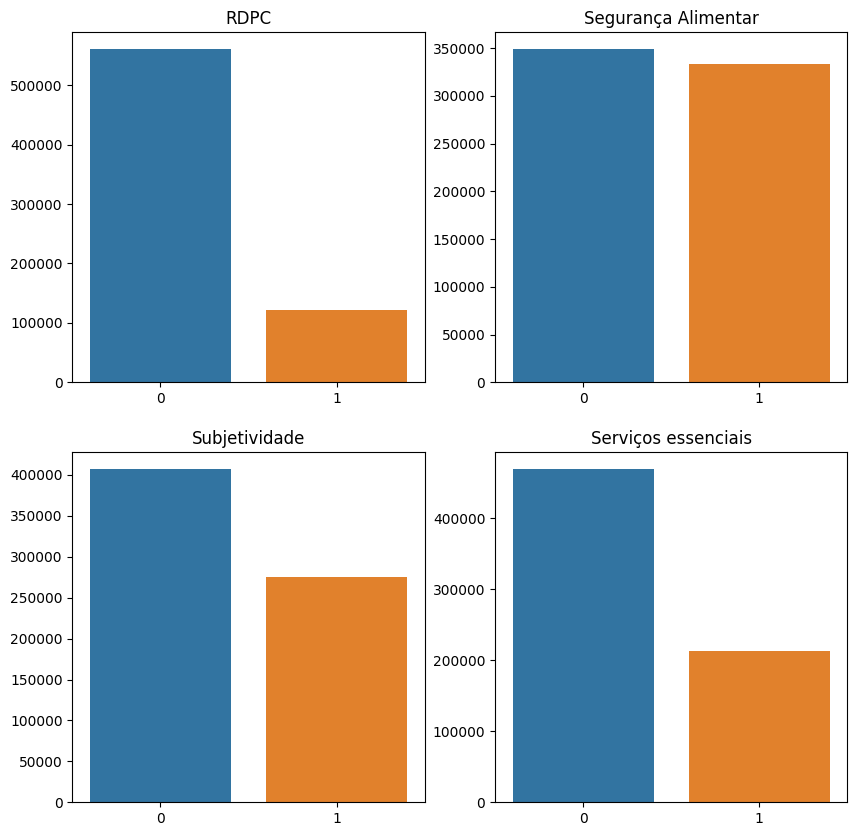

In [79]:
# Grid das 4 variaveis
# plano
fig, eixos = mplt.subplots (2, 2, figsize=(10,10) )

# grafico1 = sn.countplot(MORADOR, x = 'var_depend1')
sn.countplot(base, x='rdpc', ax=eixos[0,0])
eixos[0,0].set_title('RDPC')
eixos[0,0].set_xlabel('')
eixos[0,0].set_ylabel('')

# grafico2 = sn.countplot(DOMICILIO, x = 'var_depend2')
sn.countplot(base, x = 'seg_alimentar', ax=eixos[0,1])
eixos[0,1].set_title('Segurança Alimentar')
eixos[0,1].set_xlabel('')
eixos[0,1].set_ylabel('')

# grafico3 = sn.countplot(CONDICOES_VIDA, x = 'var_depend3')
sn.countplot(base, x = 'subjetividade', ax= eixos[1,0])
eixos[1,0].set_title('Subjetividade')
eixos[1,0].set_xlabel('')
eixos[1,0].set_ylabel('')

# grafico4 = sn.countplot(DOMICILIO, x = 'var_depend4')
sn.countplot(base, x = 'serv_essenciais', ax= eixos[1,1])
eixos[1,1].set_title('Serviços essenciais')
eixos[1,1].set_xlabel('')
eixos[1,1].set_ylabel('')

mplt.show()

# Tabelas
Tabelas que mostram a frequência de ocorrência entre a variável 'V6199 - Segurança Alimentar' e outras variáveis

In [80]:
# distribuição dos domicílios conforme o grau de (in)segurança
# # Tabela cruzando a info de renda (usando os 2 extratos que criamos msm, <= ¼ de
# # Salário Mínimo e > de ¼ de Salário Mínimo ) com a variável de insegurança
# # alimentar
# outros cruzamentos

cruzamentos = ['TIPO_SITUACAO_REG','rdpc','RENDIMENTO_TOTAL','PADRAO_FAMILIA','ESCOADOURO','DESTINO_LIXO','PAVIMENTACAO','IDADE','COR_RACA','SEXO','INSTRUCAO','GRANDE_REGIAO']
arquivo = pd.ExcelWriter('tabelas.xlsx', engine='xlsxwriter')

for i in cruzamentos:
    tabela = pd.crosstab(base[i], base['SEG_ALIMENTAR_V'])
    print('')
    print('')
    print('')
    print(f'Cruzamento Segurança Alimentar e {i}')
    print('')
    print(tabela)
    nome_planilha = re.sub(r'[\[\]:*?/\\]', '_', f'{i}')
    tabela.to_excel(arquivo, sheet_name=nome_planilha)
    
arquivo.save()





Cruzamento Segurança Alimentar e TIPO_SITUACAO_REG

SEG_ALIMENTAR_V         1       2      3      4
TIPO_SITUACAO_REG                              
1                  274802  157000  57821  34559
2                   74272   47734  20998  15436



Cruzamento Segurança Alimentar e rdpc

SEG_ALIMENTAR_V       1       2      3      4
rdpc                                         
0                321354  164072  50279  25249
1                 27720   40662  28540  24746



Cruzamento Segurança Alimentar e RENDIMENTO_TOTAL

SEG_ALIMENTAR_V        1      2      3      4
RENDIMENTO_TOTAL                             
1                  18711  37182  28906  25731
2                  54794  63498  26349  14488
3                 137815  82468  20723   8362
4                  75371  12933   1806    898
5                  57694   7914    858    238
6                   4689    739    177    278



Cruzamento Segurança Alimentar e PADRAO_FAMILIA

SEG_ALIMENTAR_V       1      2      3      4
PADRAO_F

C:\Users\Computadores Gamer\AppData\Local\Temp\ipykernel_11216\2201981048.py:21: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  arquivo.save()


# V de Cramer
Media de associação entre vairáveis categóricas não binárias.
Tem valor entre 0 e 1 e quanto mais próximo de 1 maior é o grau de associação entre as variáveis em questão.

In [81]:
def v_cramer(coluna_2):
    matriz_confusao = pd.crosstab(base['SEG_ALIMENTAR_V'], base[coluna_2]).to_numpy()
    chi2 = ss.chi2_contingency(matriz_confusao)[0]
    n = matriz_confusao.sum()
    phi2 = chi2/n
    r,k = matriz_confusao.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))

var = ['RENDIMENTO_TOTAL','PADRAO_FAMILIA','ESCOADOURO','DESTINO_LIXO','PAVIMENTACAO','IDADE','COR_RACA','SEXO','INSTRUCAO','GRANDE_REGIAO','TIPO_SITUACAO_REG']

for i in var:
    v_cramer(i)
    print(f'V de Cramer utilizando a variável V6199 (Segurança Alimentar) e {i}: ',v_cramer(i))
    

V de Cramer utilizando a variável V6199 (Segurança Alimentar) e RENDIMENTO_TOTAL:  0.3010485595054253
V de Cramer utilizando a variável V6199 (Segurança Alimentar) e PADRAO_FAMILIA:  0.3103210025607368
V de Cramer utilizando a variável V6199 (Segurança Alimentar) e ESCOADOURO:  0.1309667414240186
V de Cramer utilizando a variável V6199 (Segurança Alimentar) e DESTINO_LIXO:  0.07515821596734872
V de Cramer utilizando a variável V6199 (Segurança Alimentar) e PAVIMENTACAO:  0.12631663194727802
V de Cramer utilizando a variável V6199 (Segurança Alimentar) e IDADE:  0.04719923576164842
V de Cramer utilizando a variável V6199 (Segurança Alimentar) e COR_RACA:  0.14500030197280425
V de Cramer utilizando a variável V6199 (Segurança Alimentar) e SEXO:  0.11063008424096236
V de Cramer utilizando a variável V6199 (Segurança Alimentar) e INSTRUCAO:  0.141794253515934
V de Cramer utilizando a variável V6199 (Segurança Alimentar) e GRANDE_REGIAO:  0.1693437346759274
V de Cramer utilizando a variável

#  Frequência Relativa
Gráficos mostrando as 5 maiores frequências relativas de cada variável.

C:\Users\Computadores Gamer\AppData\Local\Temp\ipykernel_11216\2565560813.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_auxiliar.loc[:, 'UF'] = base_auxiliar['UF'].map({11 : 'RO',12 : 'AC',13 : 'AM',14 : 'RR',15 : 'PR',16 : 'AM',17 : 'TO',21 : 'MA',22 : 'PI',23 : 'CE',
C:\Users\Computadores Gamer\AppData\Local\Temp\ipykernel_11216\2565560813.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_auxiliar.loc[:, 'SEG_ALIMENTAR_V'] = base_auxiliar['SEG_ALIMENTAR_V'].map({1 : 'Segurança',2 : 'In

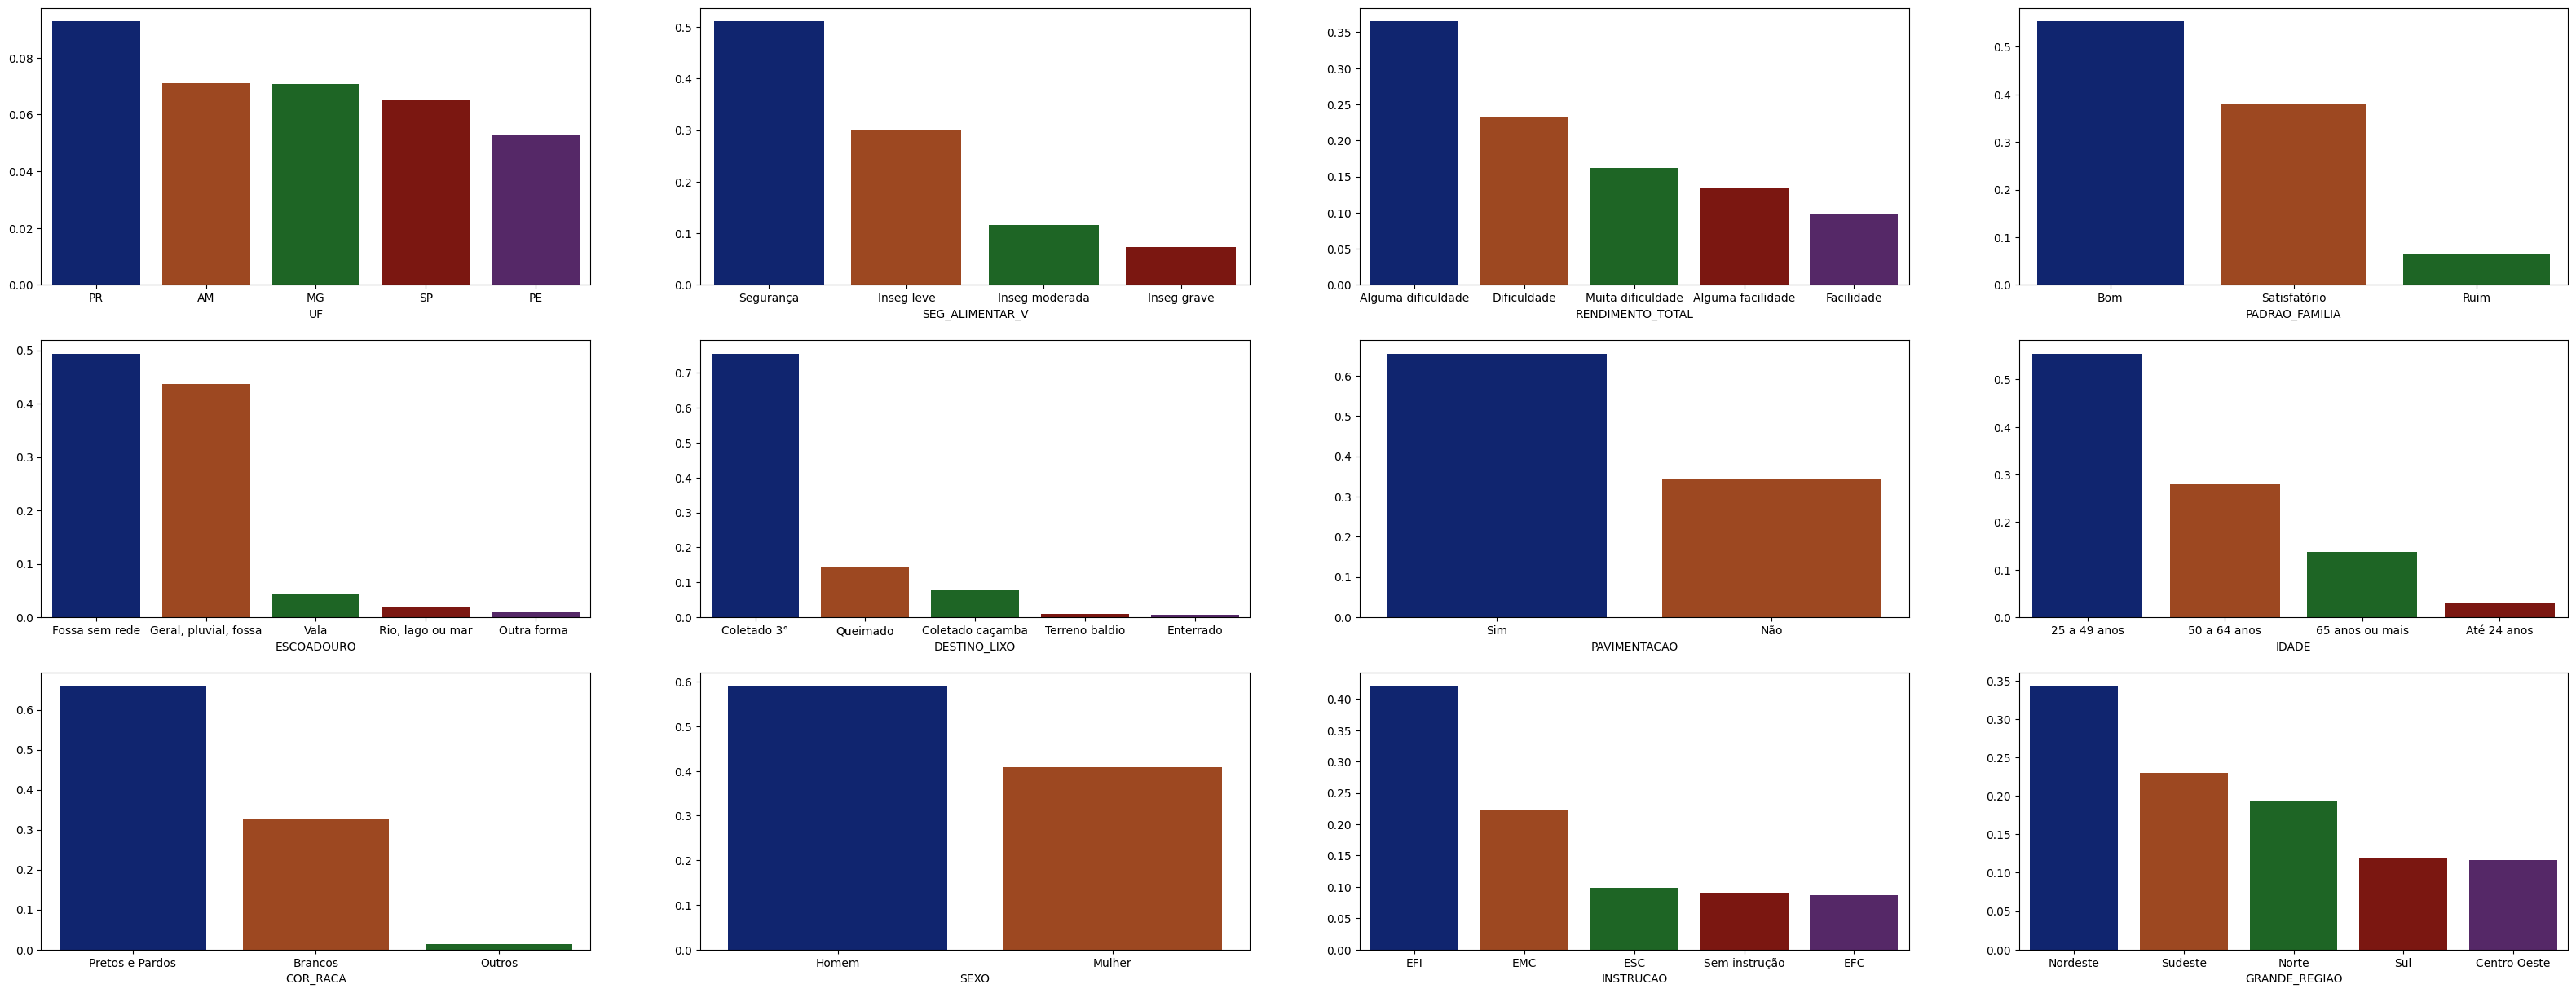

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [82]:
# variáveis numéricas
base['RENDA_MONET_PC'].describe()

# variáveis não numéricas
# graficos de frequencia relativa das 5 maiores frequencias relativas de cada variavel
base_auxiliar = base[['UF', 'ESTRATO_POF','TIPO_SITUACAO_REG','COD_UPA', 'NUM_DOM','RENDA_MONET_PC','SEG_ALIMENTAR_V','RENDIMENTO_TOTAL','PADRAO_FAMILIA','ESCOADOURO','DESTINO_LIXO','PAVIMENTACAO','IDADE','COR_RACA','SEXO','INSTRUCAO','GRANDE_REGIAO']]
var = ['UF','SEG_ALIMENTAR_V','RENDIMENTO_TOTAL','PADRAO_FAMILIA','ESCOADOURO','DESTINO_LIXO','PAVIMENTACAO','IDADE','COR_RACA','SEXO','INSTRUCAO','GRANDE_REGIAO']


#####################
# mapeamento
# UF
base_auxiliar.loc[:, 'UF'] = base_auxiliar['UF'].map({11 : 'RO',12 : 'AC',13 : 'AM',14 : 'RR',15 : 'PR',16 : 'AM',17 : 'TO',21 : 'MA',22 : 'PI',23 : 'CE',
                                24 : 'RN',25 : 'PB',26 : 'PE',27 : 'AL',28 : 'SE',29 : 'BA',31 : 'MG',32 : 'ES',33 : 'RJ',35 : 'SP',
                                41 : 'PR',42 : 'SC',43 : 'RS',50 : 'MS',51 : 'MT',52 : 'GO',53 : 'DF'}) 

# V6199 - Segurança Alimentar
base_auxiliar.loc[:, 'SEG_ALIMENTAR_V'] = base_auxiliar['SEG_ALIMENTAR_V'].map({1 : 'Segurança',2 : 'Inseg leve', 3 : 'Inseg moderada',4 : 'Inseg grave'})

# V6101 - Rendimento total família
base_auxiliar.loc[:, 'RENDIMENTO_TOTAL'] = base_auxiliar['RENDIMENTO_TOTAL'].map({1 : 'Muita dificuldade',2 : 'Dificuldade', 3 : 'Alguma dificuldade',4 : 'Alguma facilidade', 5:'Facilidade', 6:'Muita facilidade'})

# V61041 - Padrão de vida família
base_auxiliar.loc[:, 'PADRAO_FAMILIA'] = base_auxiliar['PADRAO_FAMILIA'].map({1 : 'Bom',2 : 'Satisfatório', 3 : 'Ruim'})

# V0212 - Escoadouro
base_auxiliar.loc[:, 'ESCOADOURO'] = base_auxiliar['ESCOADOURO'].map({1 : 'Geral, pluvial, fossa',2 : 'Fossa sem rede', 3 : 'Vala',4 : 'Rio, lago ou mar', 5:'Outra forma '})

# V0213 - Destino lixo
base_auxiliar.loc[:, 'DESTINO_LIXO']  = base_auxiliar['DESTINO_LIXO'].map({1 : 'Coletado 3°',2 : 'Coletado caçamba', 3 : 'Queimado',4 : 'Enterrado', 5:'Terreno baldio', 6:'Outro'})

# V0220 - Pavimentação
base_auxiliar.loc[:, 'PAVIMENTACAO']  = base_auxiliar['PAVIMENTACAO'].map({1 : 'Sim',2 : 'Não'})

# C1 - Idade PR
base_auxiliar.loc[:, 'IDADE']  = base_auxiliar['IDADE'].map({1 : 'Até 24 anos',2 : '25 a 49 anos', 3 : '50 a 64 anos',4 : '65 anos ou mais'})

# C2 - Cor ou raça PR
base_auxiliar.loc[:, 'COR_RACA']  = base_auxiliar['COR_RACA'].map({1 : 'Brancos',2 : 'Pretos e Pardos', 3 : 'Outros'})

# C3 - Sexo PR
base_auxiliar.loc[:, 'SEXO'] = base_auxiliar['SEXO'].map({1 : 'Homem',2 : 'Mulher'})

# C4 - Instrução PR
base_auxiliar.loc[:, 'INSTRUCAO'] = base_auxiliar['INSTRUCAO'].map({1 : 'Sem instrução',2 : 'EFI', 3 : 'EFC',4 : 'EMI', 5:'EMC',
                                               6:'ESI', 7:'ESC'})

# GRANDE_REGIAO - Região Geográfica 
base_auxiliar.loc[:, 'GRANDE_REGIAO'] = base_auxiliar['GRANDE_REGIAO'].map({1 : 'Norte',2 : 'Nordeste', 3 : 'Sudeste',4 : 'Sul', 5:'Centro Oeste'})
#####################

# mudando nome das colunas
# colunas_novas = ['UF', 'ESTRATO_POF','TIPO_SITUACAO_REG','COD_UPA', 'NUM_DOM','RENDA_MONET_PC','Segurança Alimentar','Rendimento total família','Padrão de vida família','Escoadouro','Destino do lixo','Pavimentação','Idade PR','Cor ou raça PR','Sexo PR','Instrução PR','Região Geográfica']
# base_auxiliar.columns = colunas_novas


fig, eixo = fig, eixos = mplt.subplots (3, 4, figsize=(40,15))
for i, z in zip(var, eixo.flatten()):
        freq_relativa = base_auxiliar[i].value_counts(normalize = True).nlargest(5)
        mplt.figure()
        grafico = sn.barplot(x=freq_relativa.index, y = freq_relativa.values, palette='dark', ax=z)
        grafico.set(xlabel = i)
mplt.tight_layout()
mplt.show()
    


    UF  RENDA_MONET_PC
0   PR      473.559169
1   MA      543.516753
2   AL      611.212346
3   AM      616.980057
4   CE      733.553145
5   TO      736.921041
6   AM      760.421388
7   PB      801.620164
8   BA      807.962405
9   AC      828.021267
10  PE      828.270777
11  RR      858.693254
12  RN      862.830612
13  PI      868.820106
14  RO      901.966406
15  SE      922.366520
16  MG     1076.078915
17  GO     1080.210599
18  ES     1128.001048
19  MT     1149.799871
20  MS     1173.898853
21  RJ     1260.976310
22  PR     1300.680094
23  SC     1436.430667
24  RS     1471.723151
25  SP     1540.291607
26  DF     2337.712966


<Axes: xlabel='UF', ylabel='RENDA_MONET_PC'>

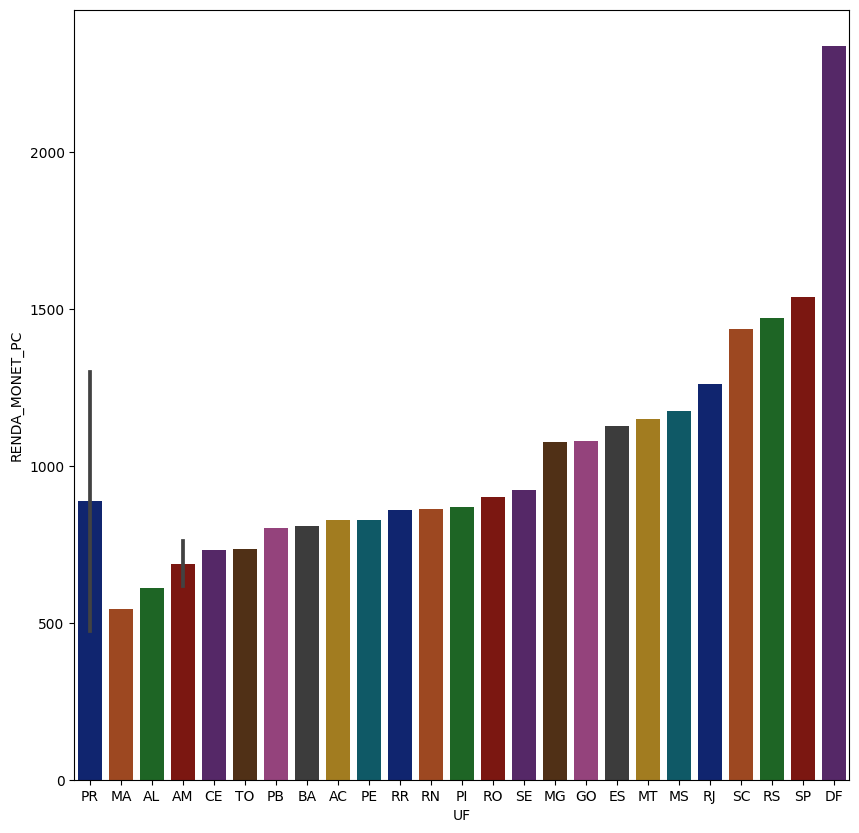

In [83]:
# Gráfico renda media por estado
media_renda_uf = base.groupby('UF')['RENDA_MONET_PC'].mean().sort_values()
tabela = pd.DataFrame(media_renda_uf).reset_index()


tabela['UF'] = tabela['UF'].map({11 : 'RO',
                               12 : 'AC',
                                13 : 'AM',
                                14 : 'RR',
                                15 : 'PR',
                                16 : 'AM',
                                17 : 'TO',
                                21 : 'MA',
                                22 : 'PI',
                                23 : 'CE',
                                24 : 'RN',
                                25 : 'PB',
                                26 : 'PE',
                                27 : 'AL',
                                28 : 'SE',
                                29 : 'BA',
                                31 : 'MG',
                                32 : 'ES',
                                33 : 'RJ',
                                35 : 'SP',
                                41 : 'PR',
                                42 : 'SC',
                                43 : 'RS',
                                50 : 'MS',
                                51 : 'MT',
                                52 : 'GO',
                                53 : 'DF'}) 
print(tabela)

fig, ax = mplt.subplots(figsize = (10,10))
sn.barplot(y='RENDA_MONET_PC', x='UF', data = tabela, ax=ax, palette='dark')




In [84]:
# Criação das dummies
# C4 - Nível de Instrução da pessoa (perfil do chefe)
    # 1 – Sem instrução
    # 2 – Ensino Fundamental Incompleto
    # 3 – Ensino Fundamental Completo 
    # 4 – Ensino Médio Incompleto
    # 5 – Ensino Médio Completo 
    # 6 – Ensino Superior Incompleto
    # 7 – Ensino Superior Completo - dummy

# C3 - Sexo (PERFIL DO CHEFE)
    # 1- Masculino - dummy
    # 2- Feminino

# C2 - Cor ou raça (PERFI DO CHEFE)
    # 1 – Brancos - dummy
    # 2 – Pretos e Pardos
    # 3 – Outros

# C1 - IDADE - PERFIL DO CHEFE
    # 1 – Até 24 anos
    # 2 – 25 a 49 anos
    # 3 – 50 a 64 anos - dummy 
    # 4 – 65 anos ou mais - dummy

# GRANDE_REGIAO - REGIÃO (DUMY) - referência é o sudeste
    # 1- Norte
    # 2- Nordeste
    # 3- Sudeste - dummy
    # 4- Sul
    # 5- Centro-Oeste
    
# TIPO_SITUACAO_REG urbano (1) x rural (2)
    # 1 - Urbano - dummy
    # 2 - Rural


# VARIÁVEIS DEPENDENTES
# rdpc
# seg_alimentar
# subjetividade
# serv_essenciais

# base = base[['rdpc','seg_alimentar','subjetividade','serv_essenciais', 'TIPO_SITUACAO_REG','GRANDE_REGIAO', 'C1', 'C2', 'C3', 'C4']]

# # criacao de dummies
base = pd.get_dummies(base, columns=['TIPO_SITUACAO_REG', 'GRANDE_REGIAO','IDADE','COR_RACA','SEXO','INSTRUCAO'])


# # considerando apenas as dummies de referencia
base = base[['UF','rdpc','seg_alimentar','subjetividade','serv_essenciais', 'INSTRUCAO_7', 'SEXO_1','COR_RACA_2', 'IDADE_3', 'IDADE_4',
             'GRANDE_REGIAO_3', 'TIPO_SITUACAO_REG_1', 'RENDA_MONET_PC','SEG_ALIMENTAR_V',
             'RENDIMENTO_TOTAL','PADRAO_FAMILIA','ESCOADOURO','DESTINO_LIXO','PAVIMENTACAO']]



In [85]:
# Fazer associação qui² entre V6199 e as variaveis dependentes

# def get_chi2 (z):
#     tabela_dinamica = base.pivot_table(index = z, columns='V6199', aggfunc = 'size')
#     chi2, p_valor, gl, predict = chi2_contingency(tabela_dinamica)
#     return print(f'Variavel {z} com V6199' , 'chi2:' ,round(chi2,2), ' | p_valor: ',round(p_valor,4), ' | graus de liberdade: ',gl )
   

# get_chi2('V6101')
# get_chi2('V61041')
# get_chi2('V0212')
# get_chi2('V0213')
# get_chi2('V0220')    
# get_chi2('C4_7')
# get_chi2('C3_1')
# get_chi2('C2_1')
# get_chi2('C1_3')


In [86]:
# # Correlacao de pearson entre variaveis dependentes e RENDA_MONET_PC

# # rdpc e RENDA_MONET_PC
# # Removendo valores infinitos e ausentes
# # valid_indexes1 = np.isfinite(base['rdpc']) & np.isfinite(base['RENDA_MONET_PC'])
# # filtered_rdpc = base['rdpc'][valid_indexes1]
# # filtered_renda1 = base['RENDA_MONET_PC'][valid_indexes1]

# # # Cálculo da correlação de Pearson
# # correlacao1, p_valor1 = stats.pearsonr(filtered_rdpc, filtered_renda1)
# # print('rdpc: ',correlacao1)


# # seg_alimentar e RENDA_MONET_PC
# # Removendo valores infinitos e ausentes
# valid_indexes2 = np.isfinite(base['seg_alimentar']) & np.isfinite(base['RENDA_MONET_PC'])
# filtered_seg_alimentar = base['seg_alimentar'][valid_indexes2]
# filtered_renda2 = base['RENDA_MONET_PC'][valid_indexes2]

# # Cálculo da correlação de Pearson
# correlacao2, p_valor2 = stats.pearsonr(filtered_seg_alimentar, filtered_renda2)
# print('seg_alimentar: ',correlacao2)


# # subjetividade e RENDA_MONET_PC
# # Removendo valores infinitos e ausentes
# valid_indexes3 = np.isfinite(base['subjetividade']) & np.isfinite(base['RENDA_MONET_PC'])
# filtered_subjetividade = base['subjetividade'][valid_indexes3]
# filtered_renda3 = base['RENDA_MONET_PC'][valid_indexes3]

# # Cálculo da correlação de Pearson
# correlacao3, p_valor3 = stats.pearsonr(filtered_subjetividade, filtered_renda3)
# print('subjetividade: ',correlacao3)


# # serv_essenciais e RENDA_MONET_PC
# # Removendo valores infinitos e serv_essenciais
# valid_indexes4 = np.isfinite(base['serv_essenciais']) & np.isfinite(base['RENDA_MONET_PC'])
# filtered_serv_essenciais = base['serv_essenciais'][valid_indexes4]
# filtered_renda4 = base['RENDA_MONET_PC'][valid_indexes4]

# # Cálculo da correlação de Pearson
# correlacao4, p_valor4 = stats.pearsonr(filtered_serv_essenciais, filtered_renda4)
# print('serv_essenciais: ',correlacao4)



In [87]:
# variaveis dependentes segregada e var independente geral
# base_rdpc_0 = base.loc[base['rdpc']==1]
# var_y = base_rdpc_0['rdpc']
# var_x = base_rdpc_0[['C4_7', 'C3_1','C2_1', 'C1_3', 'C1_4', 'GRANDE_REGIAO_3', 'TIPO_SITUACAO_REG_1']]

# # var independente geral
# var_x = base[['C4_7', 'C3_1','C2_1', 'C1_3', 'C1_4', 'GRANDE_REGIAO_3', 'TIPO_SITUACAO_REG_1']]
var_x = base[['INSTRUCAO_7', 'SEXO_1','COR_RACA_2', 'IDADE_3', 'IDADE_4', 'GRANDE_REGIAO_3', 'TIPO_SITUACAO_REG_1']]


In [88]:
# MQO - rdpc
# https://nathaliatito.medium.com/scikit-learn-ou-statsmodels-avaliando-meu-modelo-de-regressão-f4c04b361fa7

# rdpc
var_y = base['rdpc']
var_x = sm.add_constant(var_x)
modelo = sm.OLS(var_y, var_x ).fit()
print(modelo.summary())# Teste t de significância individual = H0 indica irrelevância da variavel, portanto :. p_valor < 0.05 aceita H1 e mantém a variavel
summary_df = pd.DataFrame(modelo.summary().tables[1][1:], columns=modelo.summary().tables[1][0])

# teste homocedasticidade
teste_homo_rdpc = sms.het_goldfeldquandt(modelo.resid, modelo.model.exog)  # exog indica variaveis exógenas, ou seja, faz uma matriz das variaveis independentes do modelo
print(teste_homo_rdpc)

# vif - rdpc
# teste de multicolinearidade, usando VIF (Variance Inflation Factor)
# caso o valor seja maior que 10, indica multicolinearidade, é preciso excluir essas variáveis
vif= [ variance_inflation_factor(var_x.values, i ) for i in range(var_x.shape[1])]
tabela_vif = pd.DataFrame({'vif':vif[1:]}, index = var_x.columns.drop('const'))
print(tabela_vif)


relatorio_mqo = pd.ExcelWriter('relatorio_mqo_rdpc.xlsx', engine='xlsxwriter')
summary_df.to_excel(relatorio_mqo, sheet_name='regressao')
teste_homo_rdpc_df = pd.DataFrame({"Statistic": teste_homo_rdpc[0], "p-value": teste_homo_rdpc[1]}, index=["Test Statistic", "p-value"])
teste_homo_rdpc_df.to_excel(relatorio_mqo, sheet_name="teste homocedasticidade")
tabela_vif.to_excel(relatorio_mqo, sheet_name="teste de multicolinearidade")
relatorio_mqo.save()


                            OLS Regression Results                            
Dep. Variable:                   rdpc   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     8733.
Date:                Mon, 20 Nov 2023   Prob (F-statistic):               0.00
Time:                        11:49:36   Log-Likelihood:            -2.8369e+05
No. Observations:              682622   AIC:                         5.674e+05
Df Residuals:                  682614   BIC:                         5.675e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.3227    

C:\Users\Computadores Gamer\AppData\Local\Temp\ipykernel_11216\284540745.py:28: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  relatorio_mqo.save()


In [89]:
# MQO - seg_alimentar
var_y = base[['seg_alimentar']]
var_x = sm.add_constant(var_x)
modelo = sm.OLS(var_y, var_x ).fit()
print(modelo.summary()) # Teste t de significância individual = H0 indica irrelevância da variavel, portanto :. p_valor < 0.05 aceita H1 e mantém a variavel
summary_df = pd.DataFrame(modelo.summary().tables[1][1:], columns=modelo.summary().tables[1][0])

# teste homocedasticidade
teste_homo_seg_alimentar = sms.het_goldfeldquandt(modelo.resid, modelo.model.exog)  # exog indica variaveis exógenas, ou seja, faz uma matriz das variaveis independentes do modelo
print(teste_homo_seg_alimentar) 

# vif - rdpc
# teste de multicolinearidade, usando VIF (Variance Inflation Factor)
# caso o valor seja maior que 10, indica multicolinearidade, é preciso excluir essas variáveis
vif= [ variance_inflation_factor(var_x.values, i ) for i in range(var_x.shape[1])]
tabela_vif = pd.DataFrame({'vif':vif[1:]}, index = var_x.columns.drop('const'))
print(tabela_vif)


relatorio_mqo = pd.ExcelWriter('relatorio_mqo_seg_alimentar.xlsx', engine='xlsxwriter')
summary_df.to_excel(relatorio_mqo, sheet_name='regressao')
teste_homo_seg_alimentar_df = pd.DataFrame({"Statistic": teste_homo_seg_alimentar[0], "p-value": teste_homo_seg_alimentar[1]}, index=["Test Statistic", "p-value"])
teste_homo_seg_alimentar_df.to_excel(relatorio_mqo, sheet_name="teste homocedasticidade")
tabela_vif.to_excel(relatorio_mqo, sheet_name="teste de multicolinearidade")
relatorio_mqo.save()

                            OLS Regression Results                            
Dep. Variable:          seg_alimentar   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     8692.
Date:                Mon, 20 Nov 2023   Prob (F-statistic):               0.00
Time:                        11:49:38   Log-Likelihood:            -4.6612e+05
No. Observations:              682622   AIC:                         9.323e+05
Df Residuals:                  682614   BIC:                         9.324e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.5457    

C:\Users\Computadores Gamer\AppData\Local\Temp\ipykernel_11216\660187049.py:25: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  relatorio_mqo.save()


In [90]:
# MQO - subjetividade
var_y = base[['subjetividade']]
var_x = sm.add_constant(var_x)
modelo = sm.OLS(var_y, var_x ).fit()
print(modelo.summary()) # Teste t de significância individual = H0 indica irrelevância da variavel, portanto :. p_valor < 0.05 aceita H1 e mantém a variavel
summary_df = pd.DataFrame(modelo.summary().tables[1][1:], columns=modelo.summary().tables[1][0])

# teste homocedasticidade
# o primeiro numero precisa ser próximo de 1 para os dados serem homocedásticos
teste_homo_subjetividade = sms.het_goldfeldquandt(modelo.resid, modelo.model.exog)  # exog indica variaveis exógenas, ou seja, faz uma matriz das variaveis independentes do modelo
print(teste_homo_subjetividade)

# vif - rdpc
# teste de multicolinearidade, usando VIF (Variance Inflation Factor)
# caso o valor seja maior que 10, indica multicolinearidade, é preciso excluir essas variáveis
vif= [ variance_inflation_factor(var_x.values, i ) for i in range(var_x.shape[1])]
tabela_vif = pd.DataFrame({'vif':vif[1:]}, index = var_x.columns.drop('const'))
print(tabela_vif)


relatorio_mqo = pd.ExcelWriter('relatorio_mqo_subjetividade.xlsx', engine='xlsxwriter')
summary_df.to_excel(relatorio_mqo, sheet_name='regressao')
teste_homo_subjetividade_df = pd.DataFrame({"Statistic": teste_homo_subjetividade[0], "p-value": teste_homo_subjetividade[1]}, index=["Test Statistic", "p-value"])
teste_homo_subjetividade_df.to_excel(relatorio_mqo, sheet_name="teste homocedasticidade")
tabela_vif.to_excel(relatorio_mqo, sheet_name="teste de multicolinearidade")
relatorio_mqo.save()

                            OLS Regression Results                            
Dep. Variable:          subjetividade   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     3898.
Date:                Mon, 20 Nov 2023   Prob (F-statistic):               0.00
Time:                        11:49:41   Log-Likelihood:            -4.6906e+05
No. Observations:              682622   AIC:                         9.381e+05
Df Residuals:                  682614   BIC:                         9.382e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.4094    

C:\Users\Computadores Gamer\AppData\Local\Temp\ipykernel_11216\2150669070.py:26: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  relatorio_mqo.save()


In [91]:
# MQO - serv_essenciais
var_y = base[['serv_essenciais']]
var_x = sm.add_constant(var_x)
modelo = sm.OLS(var_y, var_x ).fit()
print(modelo.summary()) # Teste t de significância individual = H0 indica irrelevância da variavel, portanto :. p_valor < 0.05 aceita H1 e mantém a variavel
summary_df = pd.DataFrame(modelo.summary().tables[1][1:], columns=modelo.summary().tables[1][0])

# teste homocedasticidade
teste_homo_serv_essenciais = sms.het_goldfeldquandt(modelo.resid, modelo.model.exog)  # exog indica variaveis exógenas, ou seja, faz uma matriz das variaveis independentes do modelo
print(teste_homo_serv_essenciais)

# vif - rdpc
# teste de multicolinearidade, usando VIF (Variance Inflation Factor)
# caso o valor seja maior que 10, indica multicolinearidade, é preciso excluir essas variáveis
vif= [ variance_inflation_factor(var_x.values, i ) for i in range(var_x.shape[1])]
tabela_vif = pd.DataFrame({'vif':vif[1:]}, index = var_x.columns.drop('const'))
print(tabela_vif)

relatorio_mqo = pd.ExcelWriter('relatorio_mqo_serv_essenciais.xlsx', engine='xlsxwriter')
summary_df.to_excel(relatorio_mqo, sheet_name='regressao')
teste_homo_serv_essenciais_df = pd.DataFrame({"Statistic": teste_homo_serv_essenciais[0], "p-value": teste_homo_serv_essenciais[1]}, index=["Test Statistic", "p-value"])
teste_homo_serv_essenciais_df.to_excel(relatorio_mqo, sheet_name="teste homocedasticidade")
tabela_vif.to_excel(relatorio_mqo, sheet_name="teste de multicolinearidade")
relatorio_mqo.save()



                            OLS Regression Results                            
Dep. Variable:        serv_essenciais   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.470
Method:                 Least Squares   F-statistic:                 8.640e+04
Date:                Mon, 20 Nov 2023   Prob (F-statistic):               0.00
Time:                        11:49:43   Log-Likelihood:            -2.2726e+05
No. Observations:              682622   AIC:                         4.545e+05
Df Residuals:                  682614   BIC:                         4.546e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.8832    

C:\Users\Computadores Gamer\AppData\Local\Temp\ipykernel_11216\667355668.py:24: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  relatorio_mqo.save()


In [92]:
# # regressão logistica - teste rdpc
# var_y = base[['rdpc']]
# var_y = np.ravel(var_y)
# var_x = base[['C4_7', 'C3_1','C2_1', 'C1_3', 'C1_4', 'GRANDE_REGIAO_3', 'TIPO_SITUACAO_REG_1']]

# treino_x, teste_x, treino_y, teste_y = train_test_split(var_x, var_y, test_size=0.3, random_state=1237)

# modelo = LogisticRegression()
# modelo.fit(treino_x, treino_y)
# predict_y = modelo.predict(teste_x)

# matriz_rdpc = confusion_matrix(teste_y, predict_y)
# print(matriz_rdpc)

# acuracia = accuracy_score(teste_y, predict_y)
# print(acuracia)



In [93]:
# # regressão logistica - teste seg_alimentar
# var_y = base[['seg_alimentar']]
# var_y = np.ravel(var_y)
# var_x = base[['C4_7', 'C3_1','C2_1', 'C1_3', 'C1_4', 'GRANDE_REGIAO_3', 'TIPO_SITUACAO_REG_1']]

# treino_x, teste_x, treino_y, teste_y = train_test_split(var_x, var_y, test_size=0.3, random_state=123)

# modelo = LogisticRegression()
# modelo.fit(treino_x, treino_y)
# predict_y = modelo.predict(teste_x)

# matriz_rdpc = confusion_matrix(teste_y, predict_y)
# print(matriz_rdpc)

# acuracia = accuracy_score(teste_y, predict_y)
# print(acuracia)


In [94]:
# # regressão logistica - teste subjetividade
# var_y = base[['subjetividade']]
# var_y = np.ravel(var_y)
# var_x = base[['C4_7', 'C3_1','C2_1', 'C1_3', 'C1_4', 'GRANDE_REGIAO_3', 'TIPO_SITUACAO_REG_1']]

# treino_x, teste_x, treino_y, teste_y = train_test_split(var_x, var_y, test_size=0.3, random_state=123)

# modelo = LogisticRegression()
# modelo.fit(treino_x, treino_y)
# predict_y = modelo.predict(teste_x)

# matriz_rdpc = confusion_matrix(teste_y, predict_y)
# print(matriz_rdpc)

# acuracia = accuracy_score(teste_y, predict_y)
# print(acuracia)

In [95]:
# # regressão logistica - teste serv_essenciais
# var_y = base[['serv_essenciais']]
# var_y = np.ravel(var_y)
# var_x = base[['C4_7', 'C3_1','C2_1', 'C1_3', 'C1_4', 'GRANDE_REGIAO_3', 'TIPO_SITUACAO_REG_1']]

# treino_x, teste_x, treino_y, teste_y = train_test_split(var_x, var_y, test_size=0.3, random_state=123)

# modelo = LogisticRegression()
# modelo.fit(treino_x, treino_y)
# predict_y = modelo.predict(teste_x)

# matriz_rdpc = confusion_matrix(teste_y, predict_y)
# print(matriz_rdpc)

# acuracia = accuracy_score(teste_y, predict_y)
# print(acuracia)

In [96]:
# SVC
# modelo = SVC()
# modelo.fit(treino_x, treino_y)


# predict_y = modelo.predict(teste_x)

# matriz_rdpc = confusion_matrix(teste_y, predict_y)
# print(matriz_rdpc)

# acuracia = accuracy_score(teste_y, predict_y)
# print(acuracia)
